# Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.

## What is the independent variable? What is the dependent variable?
Independent variable is the congruent words condition or incongruent words condition that is given to test the participants in the experiment.
Dependent variable is the elaped time when the participant goes through a record from each condition.

## What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices. 

Null hypothesis: $$  H_{0}: \mu_{0}\geq\mu_{1}$$
Alternative hypothesis: $$  H_{\alpha}: \mu_{0}<\mu_{1}$$

Where $\mu_{0}$ is the mean of elapsed time of congruent words condition, $\mu_{1}$ is the mean of elapsed time of incongruent words condition. Under the null hypothesis, the elaped time would be no different between two printed condition or the incongruent condition would decrease the elaped time. The significant level $\alpha=0.05$ is selected, if the p-value is less than 0.05, the null hypothesis would be rejected. 

A paired one-tailed t-test will be used since the each participant takes two tests under two different conditions and the population standard deviation is unknown.

## Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'. 

In [1]:
import pandas as pd
stroop = pd.read_csv("stroopdata.csv")

In [2]:
stroop

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


### Test whether the distributions of the elaped time per condition are normal.

In [3]:
from scipy import stats
print(stats.mstats.normaltest(stroop['Congruent']))
print(stats.mstats.normaltest(stroop['Incongruent']))

NormaltestResult(statistic=0.85207026495984284, pvalue=0.653093396926963)
NormaltestResult(statistic=13.256131677149471, pvalue=0.0013227189654814804)


### Print some descriptive statistics of the samples per group:

In [4]:
stroop.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


The distribution of elaped time of congruent condition group is close to normal, but not for incongruent condition group. The median is showed by 50% quantile, which is slightly different from the mean. We can see both distributions are skewed. Hence, the median is the better measure of century tendency compared to the mean. The standard deviation of sample can be used to measure the variablitiy.

## Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

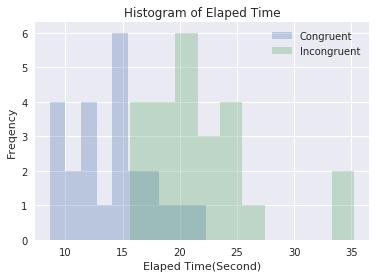

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.hist(stroop['Congruent'],alpha=0.3,label='Congruent')
plt.hist(stroop['Incongruent'],alpha=0.3,label='Incongruent')
plt.title('Histogram of Elaped Time')
plt.xlabel('Elaped Time(Second)')
plt.ylabel('Freqency')
plt.legend(loc='upper right')

plt.show()

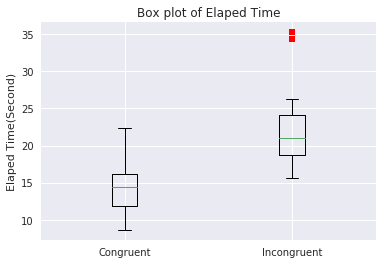

In [6]:
data=[stroop['Congruent'],stroop['Incongruent']]
plt.boxplot(data,notch=False,sym='rs',vert=True)  
plt.ylabel('Elaped Time(Second)')
plt.title('Box plot of Elaped Time')
plt.xticks([1, 2], ['Congruent', 'Incongruent'])
plt.show()

The histogram plot shows the elaped time distribution of two groups. Obviously, the incongruent group has a right shift comparing to the congruent group. The boxplot shows there are two outliers in the incongruent group, which indicates the participant may take longer time to identify the incongruent words. The outliers are relatively larger than the other but are acceptable since the sample is still small to reflect the population.

## Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [7]:
stats.ttest_rel(stroop['Congruent'],stroop['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

The T test statistic is -8.0207. The calculated one-tailed p-value is p/2 which is much less than 0.05, so it concludes that the null hypothesis can be rejected and alternative hypothesis is selected.The result matches my expectation as the participant spends more time on identifying the incongruent words.

# References

https://faculty.washington.edu/chudler/java/ready.html

https://en.wikipedia.org/wiki/Student%27s_t-test

https://en.wikipedia.org/wiki/Central_tendency

https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php

https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel